# Разработка A/B-тестирования и анализ результатов

Вы работаете продуктовым аналитиком в компании, которая разрабатывает развлекательное приложение с функцией «бесконечной» ленты, как, например, в приложениях с короткими видео. В вашем приложении существует две модели монетизации: первая — ежемесячная платная подписка, которая позволяет пользователям смотреть ленту без рекламы, вторая — демонстрация рекламы для пользователей, которые ещё не оформили подписку.

Команда разработчиков рекомендательных систем создала новый алгоритм рекомендаций, который, по их мнению, будет показывать более интересный контент для каждого пользователя. Вас, как аналитика, просят помочь рассчитать параметры A/B-теста, который позволит проверить эту гипотезу, и проанализировать его результаты.

## Описание данных

Вы будете работать с тремя таблицами:

- `sessions_project_history.csv` — таблица с историческими данными по сессиям пользователей на период с 2025-08-11 по 2025-09-23. Путь к файлу: `/datasets/sessions_project_history.csv`.

- `sessions_project_test_part.csv` — таблица с данными за первый день проведения A/B-теста, то есть за 2025-10-14. Путь к файлу: `/datasets/sessions_project_test_part.csv`.

- `sessions_project_test.csv` — таблица с данными за весь период проведения A/B-теста, то есть с 2025-10-14 по 2025-11-02. Путь к файлу: `/datasets/sessions_project_test.csv`.

У этих таблиц почти совпадает структура и содержание колонок, различаются лишь периоды наблюдения.

Поля таблиц `sessions_project_history.csv`, `sessions_project_test.csv`, `sessions_project_test_part.csv`:

- `user_id` — идентификатор пользователя;

- `session_id` — идентификатор сессии в приложении;

- `session_date` — дата сессии;

- `session_start_ts` — дата и время начала сессии;

- `install_date` — дата установки приложения;

- `session_number` — порядковый номер сессии для конкретного пользователя;

- `registration_flag` — является ли пользователь зарегистрированным;

- `page_counter` — количество просмотренных страниц во время сессии;

- `region` — регион пользователя;

- `device` — тип устройства пользователя;

- `test_group` — тестовая группа (в таблице с историческими данными этого столбца нет).


## Что нужно сделать
Ваши задачи: рассчитать параметры теста, оценить корректность его проведения и проанализировать результаты эксперимента.

### 1. Работа с историческими данными (EDA)

#### 1.1. Загрузка исторических данных
На первом этапе поработайте с историческими данными приложения:

- Импортируйте библиотеку pandas.

- Считайте и сохраните в датафрейм `sessions_history` CSV-файл с историческими данными о сессиях пользователей `sessions_project_history.csv`.

Выведите на экран первые пять строк полученного датафрейма.

In [1]:
import pandas as pd

# Загрузка данных
sessions_history = pd.read_csv('/datasets/sessions_project_history.csv')

# Вывод первых пяти строк
print(sessions_history.head(5))

            user_id        session_id session_date     session_start_ts  \
0  E302123B7000BFE4  F9AF61A0C2023832   2025-08-15  2025-08-15 17:47:35   
1  2530F72E221829FB  85003A206CBDAC6F   2025-08-15  2025-08-15 16:42:14   
2  876E020A4FC512F5  3677423E49D72DEE   2025-08-15  2025-08-15 12:30:00   
3  2640B349E1D81584  956B45F5915CA225   2025-08-15  2025-08-15 15:31:31   
4  94E1CBFAEF1F5EE9  83BF0DA35F9F1F40   2025-08-15  2025-08-15 21:33:53   

  install_date  session_number  registration_flag  page_counter region  \
0   2025-08-15               1                  0             3    CIS   
1   2025-08-15               1                  0             4   MENA   
2   2025-08-15               1                  0             4     EU   
3   2025-08-15               1                  0             4    CIS   
4   2025-08-15               1                  0             3    CIS   

    device  
0   iPhone  
1  Android  
2       PC  
3  Android  
4  Android  


#### 1.2. Знакомство с данными
- Для каждого уникального пользователя `user_id` рассчитайте количество уникальных сессий `session_id`.

- Выведите на экран все данные из таблицы `sessions_history` для одного пользователя с наибольшим количеством сессий. Если таких пользователей несколько, выберите любого из них.

- Изучите таблицу для одного пользователя, чтобы лучше понять логику формирования каждого столбца данных.



In [2]:
# Количество уникальных сессий для каждого пользователя
user_sessions_count = sessions_history.groupby('user_id')['session_id'].nunique()

# Пользователь с наибольшим количеством сессий
max_sessions_user = user_sessions_count.idxmax()
max_sessions_count = user_sessions_count.max()

print(f"Пользователь с наибольшим количеством сессий: {max_sessions_user}")
print(f"Количество сессий: {max_sessions_count}")
print("\n" + "="*50 + "\n")

# Все данные для этого пользователя
user_data = sessions_history[sessions_history['user_id'] == max_sessions_user]
print(f"Все данные для пользователя {max_sessions_user}:")
print(user_data)

Пользователь с наибольшим количеством сессий: 10E0DEFC1ABDBBE0
Количество сессий: 10


Все данные для пользователя 10E0DEFC1ABDBBE0:
                 user_id        session_id session_date     session_start_ts  \
115558  10E0DEFC1ABDBBE0  B8F0423BBFFCF5DC   2025-08-14  2025-08-14 13:57:39   
191751  10E0DEFC1ABDBBE0  87CA2FA549473837   2025-08-15  2025-08-15 16:42:10   
239370  10E0DEFC1ABDBBE0  4ADD8011DCDCE318   2025-08-16  2025-08-16 19:53:21   
274629  10E0DEFC1ABDBBE0  DF0FD0E09BF1F3D7   2025-08-17  2025-08-17 15:03:43   
302501  10E0DEFC1ABDBBE0  3C221774B4DE6885   2025-08-18  2025-08-18 17:29:14   
325557  10E0DEFC1ABDBBE0  031BD7A67048105B   2025-08-19  2025-08-19 13:23:55   
345336  10E0DEFC1ABDBBE0  FF4315CF4AD4B100   2025-08-20  2025-08-20 19:31:54   
377532  10E0DEFC1ABDBBE0  4045FEA0747203B4   2025-08-22  2025-08-22 17:54:13   
403538  10E0DEFC1ABDBBE0  344B086C421C7F37   2025-08-24  2025-08-24 14:46:13   
414743  10E0DEFC1ABDBBE0  054F20BA371E4C9D   2025-08-25  2025-08-25

#### 1.3. Анализ числа регистраций
Одна из важнейших метрик продукта — число зарегистрированных пользователей. Используя исторические данные, визуализируйте, как менялось число регистраций в приложении за время его существования.

- Агрегируйте исторические данные и рассчитайте число уникальных пользователей и число зарегистрированных пользователей для каждого дня наблюдения. Для простоты считайте, что у пользователя в течение дня бывает одна сессия максимум и статус регистрации в течение одного дня не может измениться.

- Постройте линейные графики общего числа пользователей и общего числа зарегистрированных пользователей по дням. Отобразите их на одном графике.

- Постройте отдельный линейный график доли зарегистрированных пользователей от всех пользователей по дням.

- На обоих графиках должны быть заголовок, подписанные оси X и Y, сетка и легенда.

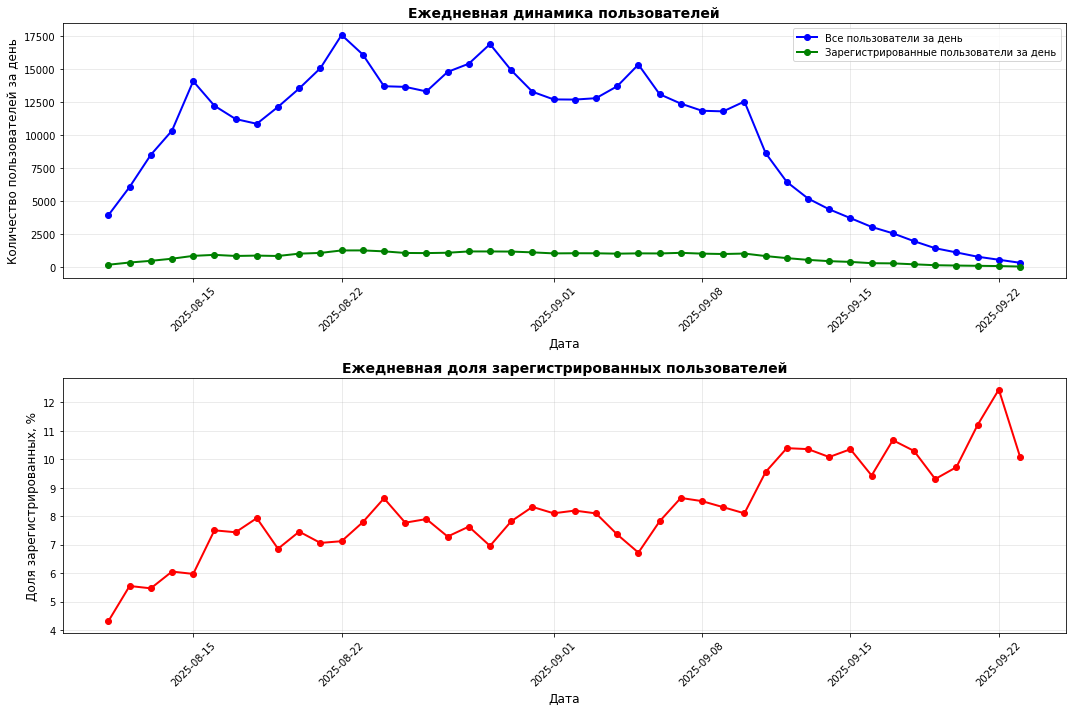

Статистика по ежедневным регистрациям:
Среднее количество пользователей в день: 9907
Среднее количество регистраций в день: 766
Средняя доля зарегистрированных: 8.24%


In [3]:
import matplotlib.pyplot as plt

# Данные по дням
daily_stats = sessions_history.groupby('session_date').agg(
    daily_total_users=('user_id', 'nunique'),
    daily_registered_users=('registration_flag', 'sum')
).reset_index()

# Дату в datetime
daily_stats['session_date'] = pd.to_datetime(daily_stats['session_date'])

# Сортируем по дате
daily_stats = daily_stats.sort_values('session_date')

# Доля зарегистрированных пользователей
daily_stats['daily_registration_rate'] = daily_stats['daily_registered_users'] / daily_stats['daily_total_users']

# Графики
plt.figure(figsize=(15, 10))

# Первый график: ежедневное число пользователей
plt.subplot(2, 1, 1)
plt.plot(daily_stats['session_date'], daily_stats['daily_total_users'], 
         label='Все пользователи за день', linewidth=2, color='blue', marker='o')
plt.plot(daily_stats['session_date'], daily_stats['daily_registered_users'], 
         label='Зарегистрированные пользователи за день', linewidth=2, color='green', marker='o')

plt.title('Ежедневная динамика пользователей', fontsize=14, fontweight='bold')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Количество пользователей за день', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(rotation=45)

# Второй график: ежедневная доля зарегистрированных пользователей
plt.subplot(2, 1, 2)
plt.plot(daily_stats['session_date'], daily_stats['daily_registration_rate'] * 100, 
         linewidth=2, color='red', marker='o')

plt.title('Ежедневная доля зарегистрированных пользователей', fontsize=14, fontweight='bold')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Доля зарегистрированных, %', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Статистика
print("Статистика по ежедневным регистрациям:")
print(f"Среднее количество пользователей в день: {daily_stats['daily_total_users'].mean():.0f}")
print(f"Среднее количество регистраций в день: {daily_stats['daily_registered_users'].mean():.0f}")
print(f"Средняя доля зарегистрированных: {daily_stats['daily_registration_rate'].mean():.2%}")

In [4]:
daily_stats.head()

,session_date,daily_total_users,daily_registered_users,daily_registration_rate
0,2025-08-11,3919,169,0.043123
1,2025-08-12,6056,336,0.055482
2,2025-08-13,8489,464,0.054659
3,2025-08-14,10321,625,0.060556
4,2025-08-15,14065,840,0.059723


#### 1.4. Анализ числа просмотренных страниц
Другая важная метрика продукта — число просмотренных страниц в приложении. Чем больше страниц просмотрено, тем сильнее пользователь увлечён контентом, а значит, выше шансы, что он зарегистрируется и оплатит подписку.

- Найдите количество сессий для каждого значения количества просмотренных страниц. Например: одну страницу просмотрели в 29 160 сессиях, две страницы — в 105 536 сессиях и так далее.

- Постройте столбчатую диаграмму, где по оси X будет число просмотренных страниц, по оси Y — количество сессий.

- На диаграмме должны быть заголовок, подписанные оси X и Y.

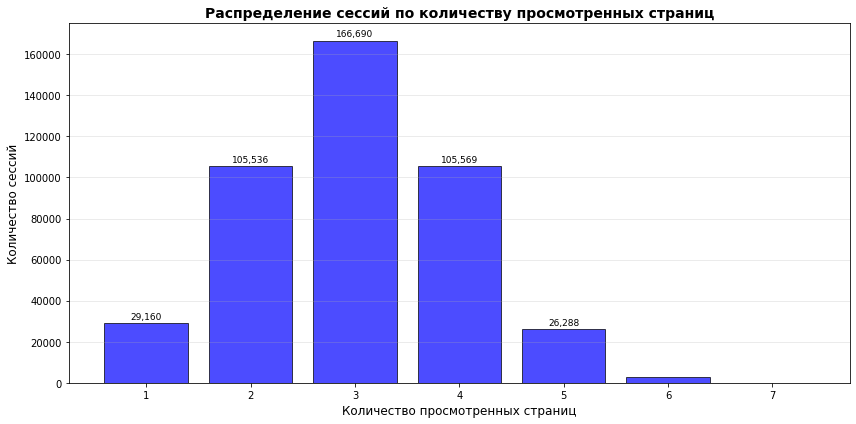

Статистика распределения просмотренных страниц:
   page_counter  session_count
0             1          29160
1             2         105536
2             3         166690
3             4         105569
4             5          26288
5             6           2589
6             7             92

Медианное количество страниц за сессию: 3.0
Среднее количество страниц за сессию: 3.01
Максимальное количество страниц за сессию: 7


In [5]:
# Данные по количеству просмотренных страниц и считаем количество сессий
page_counter_distribution = sessions_history.groupby('page_counter')['session_id'].count().reset_index()
page_counter_distribution.columns = ['page_counter', 'session_count']

# Сортируем по количеству страниц
page_counter_distribution = page_counter_distribution.sort_values('page_counter')

# Столбчатая диаграмму
plt.figure(figsize=(12, 6))
plt.bar(page_counter_distribution['page_counter'], page_counter_distribution['session_count'], 
        color='blue', edgecolor='black', alpha=0.7)

plt.title('Распределение сессий по количеству просмотренных страниц', fontsize=14, fontweight='bold')
plt.xlabel('Количество просмотренных страниц', fontsize=12)
plt.ylabel('Количество сессий', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Подписи значений на столбцы (для наглядности)
for i, value in enumerate(page_counter_distribution['session_count']):
    if value > 10000:  # Подписываем только значительные значения
        plt.text(page_counter_distribution['page_counter'].iloc[i], value + 1000, 
                f'{value:,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Статистика
print("Статистика распределения просмотренных страниц:")
print(page_counter_distribution)
print(f"\nМедианное количество страниц за сессию: {sessions_history['page_counter'].median()}")
print(f"Среднее количество страниц за сессию: {sessions_history['page_counter'].mean():.2f}")
print(f"Максимальное количество страниц за сессию: {sessions_history['page_counter'].max()}")

#### 1.5. Доля пользователей, просмотревших более четырёх страниц
Продуктовая команда продукта считает, что сессии, в рамках которых пользователь просмотрел 4 и более страниц, говорят об удовлетворённости контентом и алгоритмами рекомендаций. Этот показатель является важной прокси-метрикой для продукта.

- В датафрейме `sessions_history` создайте дополнительный столбец `good_session`. В него войдёт значение `1`, если за одну сессию было просмотрено 4 и более страниц, и значение `0`, если было просмотрено меньше.

- Постройте график со средним значением доли успешных сессий от всех сессий по дням за весь период наблюдения.

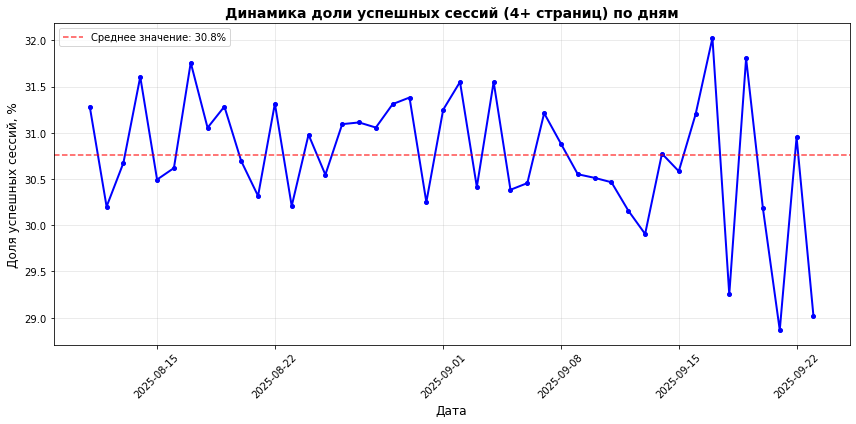

Статистика по успешным сессиям:
Общее количество сессий: 435924
Количество успешных сессий (4+ страниц): 134538
Средняя доля успешных сессий: 30.8%
Минимальная доля за период: 28.9%
Максимальная доля за период: 32.0%


In [6]:
# Создаем столбец good_session
sessions_history['good_session'] = (sessions_history['page_counter'] >= 4).astype(int)

# Группируем по дням и считаем долю успешных сессий
daily_good_sessions = sessions_history.groupby('session_date').agg(
    total_sessions=('session_id', 'count'),
    good_sessions=('good_session', 'sum')
).reset_index()

daily_good_sessions['good_session_rate'] = daily_good_sessions['good_sessions'] / daily_good_sessions['total_sessions']

# Дата в datetime
daily_good_sessions['session_date'] = pd.to_datetime(daily_good_sessions['session_date'])

# Сортируем по дате
daily_good_sessions = daily_good_sessions.sort_values('session_date')

# График
plt.figure(figsize=(12, 6))
plt.plot(daily_good_sessions['session_date'], daily_good_sessions['good_session_rate'] * 100, 
         linewidth=2, color='blue', marker='o', markersize=4)

plt.title('Динамика доли успешных сессий (4+ страниц) по дням', fontsize=14, fontweight='bold')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Доля успешных сессий, %', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Аннотация со средним значением
mean_rate = daily_good_sessions['good_session_rate'].mean() * 100
plt.axhline(y=mean_rate, color='red', linestyle='--', alpha=0.7, 
            label=f'Среднее значение: {mean_rate:.1f}%')
plt.legend()

plt.tight_layout()
plt.show()

# Статистика
print("Статистика по успешным сессиям:")
print(f"Общее количество сессий: {daily_good_sessions['total_sessions'].sum()}")
print(f"Количество успешных сессий (4+ страниц): {daily_good_sessions['good_sessions'].sum()}")
print(f"Средняя доля успешных сессий: {mean_rate:.1f}%")
print(f"Минимальная доля за период: {daily_good_sessions['good_session_rate'].min() * 100:.1f}%")
print(f"Максимальная доля за период: {daily_good_sessions['good_session_rate'].max() * 100:.1f}%")

### 2. Подготовка к тесту
При планировании теста необходимо проделать несколько важных шагов:

- Сформулировать нулевую и альтернативную гипотезы

- Определиться с целевой метрикой.

- Рассчитать необходимый размер выборки.

- Исходя из текущих значений трафика рассчитать необходимую длительность проведения теста.

#### 2.1 Формулировка нулевой и альтернативной гипотез

Перед тем как проводить А/B-тест, необходимо сформулировать нулевую и альтернативную гипотезы. Напомним изначальное условие: команда разработчиков рекомендательных систем создала новый алгоритм, который, по их мнению, будет показывать более интересный контент для каждого пользователя.

О какой метрике идёт речь? Как она будет учтена в формулировке гипотез?

Сформулируйте нулевую и альтернативную гипотезы:






***Основная метрика:*** Доля успешных сессий (good_session_rate) - процент сессий, в которых пользователь просмотрел 4 и более страниц.

***Обоснование выбора метрики:***

- Прямо отражает вовлеченность пользователя в контент

- Коррелирует с удовлетворенностью рекомендациями

- Является leading indicator для регистраций и подписок

- Легко измерима и интерпретируема

***Нулевая гипотеза (H₀)***:
Новый алгоритм рекомендаций не влияет на долю успешных сессий. Различие в среднем значении доли сессий с 4+ страницами между контрольной и тестовой группами является статистически незначимым и обусловлено случайными колебаниями.

***Альтернативная гипотеза (H₁)***:
Новый алгоритм рекомендаций увеличивает долю успешных сессий. Различие в среднем значении доли сессий с 4+ страницами между тестовой и контрольной группами является статистически значимым, что свидетельствует о улучшении качества рекомендаций.

#### 2.2. Расчёт размера выборки
В рамках курса вы уже рассчитывали размеры выборки и  использовали для этого онлайн-калькулятор. В этом задании предлагаем воспользоваться готовым кодом и рассчитать необходимое для вашего эксперимента количество пользователей.

Для этого установите в коде ниже следующие параметры:

- Уровень значимости — 0.05.

- Вероятность ошибки второго рода — 0.2.

- Мощность теста.

- Минимальный детектируемый эффект, или MDE, — 3%. Обратите внимание, что здесь нужно указать десятичную дробь, а не процент.

При расчёте размера выборки используйте метод `solve_power()` из класса `power.NormalIndPower` модуля `statsmodels.stats`.

Запустите ячейку и изучите полученное значение.

In [7]:
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize

# Задаём параметры
alpha = 0.05  # Уровень значимости
beta = 0.2  # Ошибка второго рода, часто 1 - мощность
power = 0.8  # Мощность теста
p = 0.3 # Базовый уровень доли
mde = 0.03 * p  # Минимальный детектируемый эффект
p1 = p
effect_size = proportion_effectsize(p1, p1 + mde)

# Инициализируем класс NormalIndPower
power_analysis = NormalIndPower()

# Рассчитываем размер выборки
sample_size = power_analysis.solve_power(
    effect_size = effect_size,
    power = power,
    alpha = alpha,
    ratio = 1 # Равномерное распределение выборок
)

print(f"Необходимый размер выборки для каждой группы: {int(sample_size)}")

Необходимый размер выборки для каждой группы: 41040


#### 2.3. Расчёт длительности A/B-теста

Используйте данные о количестве пользователей в каждой выборке и среднем количестве пользователей приложения. Рассчитайте длительность теста, разделив одно на другое.

- Рассчитайте среднее количество уникальных пользователей приложения в день.

- Определите длительность теста исходя из рассчитанного значения размера выборок и среднего дневного трафика приложения. Количество дней округлите в большую сторону.

In [8]:
from math import ceil

# Среднее количество пользователей приложения в день по историческим данным
avg_daily_users = round(sessions_history.groupby(by='session_date')['user_id'].nunique().mean())
display(avg_daily_users)

# Рассчитываем длительность теста в днях как отношение размера выборки к среднему числу пользователей
test_duration = ceil(sample_size*2/avg_daily_users)

print(f"Рассчитанная длительность A/B-теста при текущем уровене трафика в {avg_daily_users} пользователей в день составит {test_duration} дней")

9907

Рассчитанная длительность A/B-теста при текущем уровене трафика в 9907 пользователей в день составит 9 дней


### 3. Мониторинг А/В-теста

#### 3.1. Проверка распределения пользователей

A/B-тест успешно запущен, и уже доступны данные за первые три дня. На этом этапе нужно убедиться, что всё идёт хорошо: пользователи разделены правильным образом, а интересующие вас метрики корректно считаются.

- Считайте и сохраните в датафрейм `sessions_test_part` CSV-файл с историческими данными о сессиях пользователей `sessions_project_test_part.csv`.

- Рассчитайте количество уникальных пользователей в каждой из экспериментальных групп для одного дня наблюдения.

- Рассчитайте и выведите на экран процентную разницу в количестве пользователей в группах A и B. Постройте любую удобную визуализацию, на которой будет видно возможное различие двух групп.

Для расчёта процентной разницы воспользуйтесь формулой:
$$P = 100 \cdot  \frac{|A − B|}{A}$$

Первые 5 строк данных теста:
            user_id        session_id session_date     session_start_ts  \
0  3404844B53442747  B4901323BD537E45   2025-10-14  2025-10-14 19:28:49   
1  3A2BF4D364E62D89  216FC619308F8788   2025-10-14  2025-10-14 21:11:04   
2  79CDAE11E32B1597  EDFCE4AC1A504074   2025-10-14  2025-10-14 21:44:03   
3  D6AF8D78297A931F  CF0AC0EEDE92C690   2025-10-14  2025-10-14 19:07:55   
4  37E0CE723AE568E0  2E6ED45E8C86C4E9   2025-10-14  2025-10-14 15:39:44   

  install_date  session_number  registration_flag  page_counter region  \
0   2025-10-14               1                  0             3    CIS   
1   2025-10-14               1                  0             3   MENA   
2   2025-10-14               1                  0             3    CIS   
3   2025-10-14               1                  0             4    CIS   
4   2025-10-14               1                  0             3    CIS   

    device test_group  
0  Android          B  
1   iPhone          A  
2  

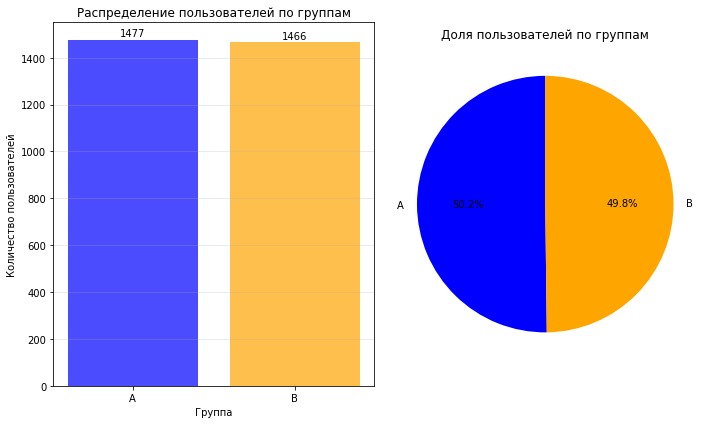


Распределение пользователей по дням и группам:
test_group       A     B
session_date            
2025-10-14    1477  1466


In [9]:
# Данные за первые три дня теста
sessions_test_part = pd.read_csv('/datasets/sessions_project_test_part.csv')

# Проверка данных
print("Первые 5 строк данных теста:")
print(sessions_test_part.head())
print("\nИнформация о данных:")
print(sessions_test_part.info())

# Количество уникальных пользователей в каждой группе
users_per_group = sessions_test_part.groupby('test_group')['user_id'].nunique()
print(f"\nКоличество уникальных пользователей по группам:")
print(users_per_group)

# Рассчитываем процентную разницу
group_a_users = users_per_group.get('A', 0)
group_b_users = users_per_group.get('B', 0)

if group_a_users > 0:
    percentage_difference = 100 * abs(group_a_users - group_b_users) / group_a_users
    print(f"\nПроцентная разница в количестве пользователей: {percentage_difference:.2f}%")
else:
    print("В группе A нет пользователей")

# Визуализация распределения пользователей по группам
plt.figure(figsize=(10, 6))

# Столбчатая диаграмма
plt.subplot(1, 2, 1)
bars = plt.bar(users_per_group.index, users_per_group.values, color=['blue', 'orange'], alpha=0.7)
plt.title('Распределение пользователей по группам')
plt.xlabel('Группа')
plt.ylabel('Количество пользователей')
plt.grid(axis='y', alpha=0.3)

# Значения на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)}', ha='center', va='bottom')

# Круговая диаграмма
plt.subplot(1, 2, 2)
plt.pie(users_per_group.values, labels=users_per_group.index, 
        autopct='%1.1f%%', colors=['blue', 'orange'], startangle=90)
plt.title('Доля пользователей по группам')

plt.tight_layout()
plt.show()

# Дополнительная проверка: распределение по дням
if 'session_date' in sessions_test_part.columns:
    daily_distribution = sessions_test_part.groupby(['session_date', 'test_group'])['user_id'].nunique().unstack()
    print("\nРаспределение пользователей по дням и группам:")
    print(daily_distribution)

#### 3.2. Проверка пересечений пользователей
Помимо проверки равенства количества пользователей в группах, полезно убедиться в том, что группы независимы. Для этого нужно убедиться, что никто из пользователей случайно не попал в обе группы одновременно.

- Рассчитайте количество пользователей, которые встречаются одновременно в группах A и B, или убедитесь, что таких нет.

In [10]:
# Есть ли пользователи, которые попали в обе группы
users_in_a = set(sessions_test_part[sessions_test_part['test_group'] == 'A']['user_id'].unique())
users_in_b = set(sessions_test_part[sessions_test_part['test_group'] == 'B']['user_id'].unique())

# Пересечение пользователей между группами
common_users = users_in_a & users_in_b

print(f"Количество пользователей в группе A: {len(users_in_a)}")
print(f"Количество пользователей в группе B: {len(users_in_b)}")
print(f"Количество пользователей, попавших в обе группы: {len(common_users)}")

if len(common_users) > 0:
    print(f"\nID пользователей, попавших в обе группы:")
    for user_id in list(common_users)[:10]:  # Покажем первые 10
        print(user_id)
    
# Анализируем проблемных пользователей подробнее
    problem_users_data = sessions_test_part[sessions_test_part['user_id'].isin(common_users)]
    print(f"\nДанные по пользователям с пересечением групп:")
    print(problem_users_data[['user_id', 'test_group', 'session_date']].sort_values('user_id'))
else:
    print("\nНет пользователей, которые попали в обе группы одновременно.")

# Дополнительная проверка: каждый пользователь всегда в одной группе
user_group_consistency = sessions_test_part.groupby('user_id')['test_group'].nunique()
users_with_multiple_groups = user_group_consistency[user_group_consistency > 1]

print(f"\nКоличество пользователей с изменяющейся группой: {len(users_with_multiple_groups)}")

if len(users_with_multiple_groups) > 0:
    print("\nПользователи, которые меняли группу:")
    for user_id in users_with_multiple_groups.index[:10]:
        user_groups = sessions_test_part[sessions_test_part['user_id'] == user_id]['test_group'].unique()
        print(f"User {user_id}: группы {list(user_groups)}")

Количество пользователей в группе A: 1477
Количество пользователей в группе B: 1466
Количество пользователей, попавших в обе группы: 0

Нет пользователей, которые попали в обе группы одновременно.

Количество пользователей с изменяющейся группой: 0


#### 3.3. Равномерность разделения пользователей по устройствам
Полезно также убедиться в том, что пользователи равномерно распределены по всем доступным категориальным переменным — типам устройств и регионам.

Постройте две диаграммы:

- доля каждого типа устройства для пользователей из группы A,

- доля каждого типа устройства для пользователей из группы B.

Постарайтесь добавить на диаграммы все необходимые подписи, пояснения и заголовки, которые позволят сделать вывод о том, совпадает ли распределение устройств в группах A и B.


Доля устройств по группам (%):
device      Android   Mac    PC  iPhone
test_group                             
A              44.4  10.6  25.0    20.0
B              45.6  10.1  26.0    18.3


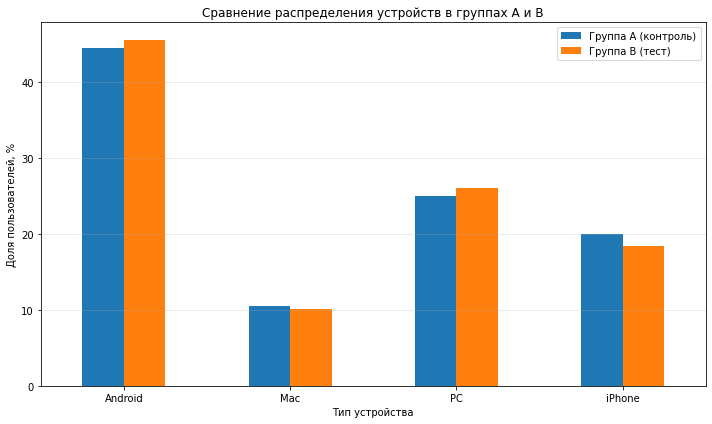


Максимальная разница между группами: 1.7%
Группы хорошо сбалансированы по устройствам


In [11]:
# Количество пользователей по устройствам для каждой группы
device_stats = sessions_test_part.groupby(['test_group', 'device'])['user_id'].nunique().unstack()

# В проценты
device_pct = device_stats.div(device_stats.sum(axis=1), axis=0) * 100

print("Доля устройств по группам (%):")
print(device_pct.round(1))

# График
plt.figure(figsize=(10, 6))
device_pct.T.plot(kind='bar', ax=plt.gca())
plt.title('Сравнение распределения устройств в группах A и B')
plt.xlabel('Тип устройства')
plt.ylabel('Доля пользователей, %')
plt.legend(['Группа A (контроль)', 'Группа B (тест)'])
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Проверяем максимальную разницу
max_diff = (device_pct.loc['A'] - device_pct.loc['B']).abs().max()
print(f"\nМаксимальная разница между группами: {max_diff:.1f}%")

if max_diff < 2:
    print("Группы хорошо сбалансированы по устройствам")
else:
    print("Есть заметные различия в распределении устройств")

#### 3.4. Равномерность распределения пользователей по регионам
Теперь убедитесь, что пользователи равномерно распределены по регионам.

Постройте две диаграммы:

- доля каждого региона для пользователей из группы A,

- доля каждого региона для пользователей из группы B.

Постарайтесь добавить на диаграммы все необходимые подписи, пояснения и заголовки, которые позволят сделать вывод о том, совпадает ли распределение регионов в группах A и B. Постарайтесь использовать другой тип диаграммы, не тот, что в прошлом задании.


Доли регионов по группам (%):
region       CIS    EU  MENA
test_group                  
A           43.6  15.2  41.2
B           44.0  14.8  41.2


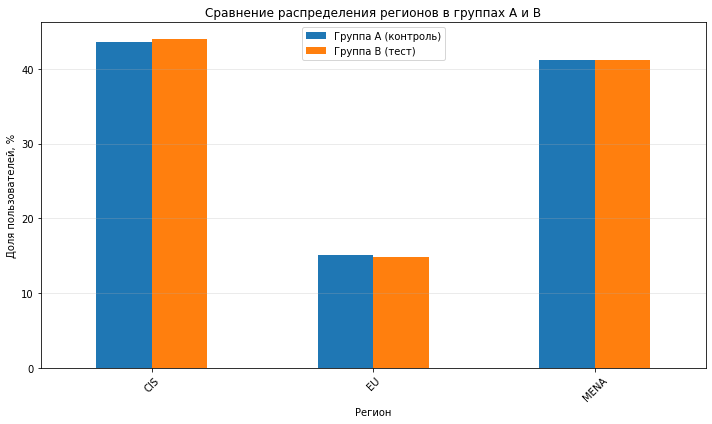


Максимальная разница между группами: 0.4%
Группы хорошо сбалансированы по регионам


In [12]:
# Доли регионов для каждой группы
region_stats = sessions_test_part.groupby(['test_group', 'region'])['user_id'].nunique()
region_pct = region_stats.groupby('test_group').apply(lambda x: x / x.sum() * 100).unstack()

print("Доли регионов по группам (%):")
print(region_pct.round(1))

# Совмещенный график
plt.figure(figsize=(10, 6))
region_pct.T.plot(kind='bar', ax=plt.gca())
plt.title('Сравнение распределения регионов в группах A и B')
plt.xlabel('Регион')
plt.ylabel('Доля пользователей, %')
plt.legend(['Группа A (контроль)', 'Группа B (тест)'])
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Проверяем баланс
max_diff = (region_pct.loc['A'] - region_pct.loc['B']).abs().max()
print(f"\nМаксимальная разница между группами: {max_diff:.1f}%")

if max_diff < 2:
    print("Группы хорошо сбалансированы по регионам")
else:
    print("Есть небольшие различия в регионах")

#### 3.5. Вывод после проверки A/B-теста

На основе проведённого анализа A/B-теста сформулируйте и запишите свои выводы. В выводе обязательно укажите:

- Было ли обнаружено различие в количестве пользователей в двух группах.

- Являются ли выборки независимыми. Было ли обнаружено пересечение пользователей из тестовой и контрольной групп.

- Сохраняется ли равномерное распределение пользователей тестовой и контрольной групп по категориальным переменным: устройствам и регионам.

Сделайте заключение: корректно ли проходит A/B-тест, или наблюдаются какие-либо нарушения.

1. Различие в количестве пользователей:

- В группе A: 1477 пользователей

- В группе B: 1466 пользователей

- Процентная разница: 0.74%

***Различие незначительное*** - группы сбалансированы по размеру

2. Независимость выборок:

- Пользователей, попавших в обе группы: 0

- Пользователей с изменяющейся группой: 0

***Выборки полностью независимы*** - нет пересечения пользователей между группами

3. Равномерное распределение по категориальным переменным:

Устройства:

- Android: 44.4% (A) vs 45.6% (B) - разница 1.2%

- Mac: 10.6% vs 10.1% - разница 0.5%

- PC: 25.0% vs 26.0% - разница 1.0%

- iPhone: 20.0% vs 18.3% - разница 1.7%

***Максимальная разница 1.7%*** - хороший баланс

Регионы:

- CIS: 43.6% (A) vs 44.0% (B) - разница 0.4%

- EU: 15.2% vs 14.8% - разница 0.4%

- MENA: 41.2% vs 41.2% - разница 0.0%

***Максимальная разница 0.4%*** - отличный баланс

***Заключение:***
    
A/B-тест проходит корректно. Все ключевые параметры свидетельствуют о качественной реализации:

- Группы статистически сбалансированы по размеру

- Отсутствует пересечение пользователей между группами

- Равномерное распределение по устройствам и регионам

### 4. Проверка результатов A/B-теста

A/B-тест завершён, и у вас есть результаты за все дни проведения эксперимента. Необходимо убедиться в корректности теста и верно интерпретировать результаты.

#### 4.1. Получение результатов теста и подсчёт основной метрики

- Считайте и сохраните в датафрейм `sessions_test` CSV-файл с историческими данными о сессиях пользователей `sessions_project_test.csv`.

- В датафрейме `sessions_test` создайте дополнительный столбец `good_session`. В него войдёт значение `1`, если за одну сессию было просмотрено 4 и более страниц, и значение `0`, если просмотрено меньше.

In [13]:
# Данные за весь период теста
sessions_test = pd.read_csv('/datasets/sessions_project_test.csv')

# Создаем столбец good_session
sessions_test['good_session'] = (sessions_test['page_counter'] >= 4).astype(int)

# Проверка результата
print("Первые 5 строк данных с новым столбцом good_session:")
print(sessions_test[['user_id', 'session_id', 'page_counter', 'good_session']].head())

print("\nРаспределение значений good_session:")
print(sessions_test['good_session'].value_counts())
print(f"Доля успешных сессий: {sessions_test['good_session'].mean():.2%}")

print("\nИнформация о данных:")
print(sessions_test.info())

Первые 5 строк данных с новым столбцом good_session:
            user_id        session_id  page_counter  good_session
0  6DAE3B3654DA738E  C69249E26E58F6E2             3             0
1  0A3FE5D1DD59110A  66D66D7C9F5181B7             2             0
2  2041F1D7AA740B88  50DE51D42215E74C             2             0
3  43D7585009168086  5763C0C353C22263             1             0
4  15AD68B14D62D88C  B1AD09F93C1053BC             2             0

Распределение значений good_session:
0    68698
1    31307
Name: good_session, dtype: int64
Доля успешных сессий: 31.31%

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100005 entries, 0 to 100004
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   user_id            100005 non-null  object
 1   session_id         100005 non-null  object
 2   session_date       100005 non-null  object
 3   session_start_ts   100005 non-null  object
 4   ins

#### 4.2. Проверка корректности результатов теста

Прежде чем приступать к анализу ключевых продуктовых метрик, необходимо убедиться, что тест проведён корректно и вы будете сравнивать две сопоставимые группы.

- Рассчитайте количество уникальных сессий для каждого дня и обеих тестовых групп, используя группировку.

- Проверьте, что количество уникальных дневных сессий в двух выборках не различается или различия не статистически значимыми. Используйте статистический тест, который позволит сделать вывод о равенстве средних двух выборок.

- В качестве ответа выведите на экран полученное значение p-value и интерпретируйте его.

Количество сессий по дням и группам:
test_group       A     B
session_date            
2025-10-14    1502  1628
2025-10-15    2235  2283
2025-10-16    3280  3241
2025-10-17    4089  4054
2025-10-18    5013  5059

Результаты статистического теста:
t-статистика: -0.0780
p-value: 0.9382

Нет статистически значимых различий в количестве сессий между группами
Группы сопоставимы по дневной активности


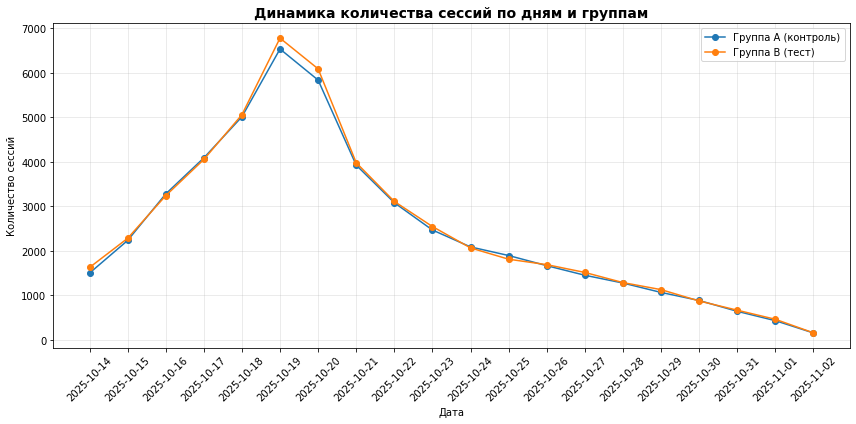


Среднее количество сессий в день:
Группа A: 2477.6
Группа B: 2522.7
Разница: 45.1 сессий


In [14]:
from scipy.stats import ttest_ind

# Количество уникальных сессий для каждого дня и группы
daily_sessions = sessions_test.groupby(['session_date', 'test_group'])['session_id'].nunique().unstack()

print("Количество сессий по дням и группам:")
print(daily_sessions.head())

# Статистическая значимость различий
group_a_sessions = daily_sessions['A'].dropna()
group_b_sessions = daily_sessions['B'].dropna()

# Проводим t-тест для независимых выборок
t_stat, p_value = ttest_ind(group_a_sessions, group_b_sessions)

print(f"\nРезультаты статистического теста:")
print(f"t-статистика: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Интерпретация результатов
if p_value < 0.05:
    print("\nЕсть статистически значимые различия в количестве сессий между группами")
    print("Это может указывать на проблемы с проведением теста")
else:
    print("\nНет статистически значимых различий в количестве сессий между группами")
    print("Группы сопоставимы по дневной активности")

# Дополнительная визуализация
plt.figure(figsize=(12, 6))
plt.plot(daily_sessions.index, daily_sessions['A'], label='Группа A (контроль)', marker='o')
plt.plot(daily_sessions.index, daily_sessions['B'], label='Группа B (тест)', marker='o')
plt.title('Динамика количества сессий по дням и группам', fontsize=14, fontweight='bold')
plt.xlabel('Дата')
plt.ylabel('Количество сессий')
plt.legend()
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Средние значения
print(f"\nСреднее количество сессий в день:")
print(f"Группа A: {group_a_sessions.mean():.1f}")
print(f"Группа B: {group_b_sessions.mean():.1f}")
print(f"Разница: {abs(group_a_sessions.mean() - group_b_sessions.mean()):.1f} сессий")

#### 4.3. Сравнение доли успешных сессий

Когда вы убедились, что количество сессий в обеих выборках не различалось, можно переходить к анализу ключевой метрики — доли успешных сессий.

Используйте созданный на первом шаге задания столбец `good_session` и рассчитайте долю успешных сессий для выборок A и B, а также разницу в этом показателе. Полученный вывод отобразите на экране.

Доля успешных сессий по группам:
            total_sessions  good_sessions  good_session_rate
test_group                                                  
A                    49551          15248             0.3077
B                    50454          16059             0.3183

Разница в долях успешных сессий:
Группа A (контроль): 0.3077 (30.77%)
Группа B (тест):     0.3183 (31.83%)
Абсолютная разница:  0.0106
Относительная разница: 3.44%


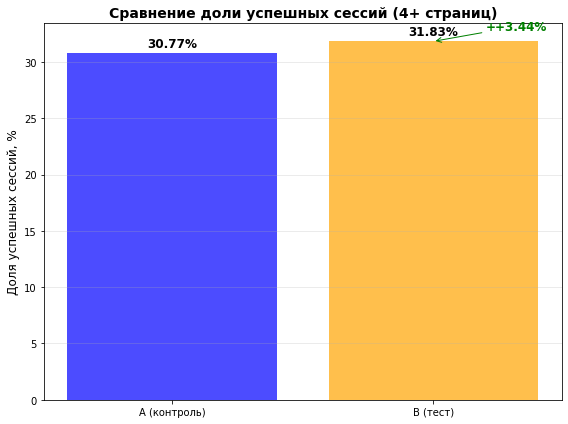

In [15]:
# Доли успешных сессий для каждой группы
group_performance = sessions_test.groupby('test_group').agg(
    total_sessions=('session_id', 'count'),
    good_sessions=('good_session', 'sum'),
    good_session_rate=('good_session', 'mean')
).round(4)

print("Доля успешных сессий по группам:")
print(group_performance)

# Разница между группами
rate_a = group_performance.loc['A', 'good_session_rate']
rate_b = group_performance.loc['B', 'good_session_rate']
absolute_diff = rate_b - rate_a
relative_diff = (rate_b - rate_a) / rate_a * 100

print(f"\nРазница в долях успешных сессий:")
print(f"Группа A (контроль): {rate_a:.4f} ({rate_a*100:.2f}%)")
print(f"Группа B (тест):     {rate_b:.4f} ({rate_b*100:.2f}%)")
print(f"Абсолютная разница:  {absolute_diff:.4f}")
print(f"Относительная разница: {relative_diff:.2f}%")

# Визуализируем результаты
plt.figure(figsize=(8, 6))
groups = ['A (контроль)', 'B (тест)']
rates = [rate_a * 100, rate_b * 100]

bars = plt.bar(groups, rates, color=['blue', 'orange'], alpha=0.7)
plt.title('Сравнение доли успешных сессий (4+ страниц)', fontsize=14, fontweight='bold')
plt.ylabel('Доля успешных сессий, %', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Значения на столбцы
for bar, rate in zip(bars, rates):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3,
             f'{rate:.2f}%', ha='center', va='bottom', fontweight='bold', fontsize=12)

# Добавляем линию разницы
plt.annotate(f'+{relative_diff:+.2f}%', 
             xy=(1, rate_b * 100), 
             xytext=(1.2, rate_b * 100 + 1),
             arrowprops=dict(arrowstyle='->', color='green'),
             fontsize=12, fontweight='bold', color='green')

plt.tight_layout()
plt.show()

#### 4.4. Насколько статистически значимо изменение ключевой метрики

На предыдущем шаге вы убедились, что количество успешных сессий в тестовой выборке примерно на 1.1% выше, чем в контрольной, но делать выводы только на основе этого значения будет некорректно. Для принятия решения всегда необходимо отвечать на вопрос: является ли это изменение статистически значимым.

- Используя статистический тест, рассчитайте, является ли изменение в метрике доли успешных сессий статистически значимым.

- Выведите на экран полученное значение p-value и свои выводы о статистической значимости. Напомним, что уровень значимости в эксперименте был выбран на уровне 0.05.

In [16]:
from statsmodels.stats.proportion import proportions_ztest

# Данные для теста
count = [group_performance.loc['B', 'good_sessions'], group_performance.loc['A', 'good_sessions']]  # [успехи в B, успехи в A]
nobs = [group_performance.loc['B', 'total_sessions'], group_performance.loc['A', 'total_sessions']]  # [общее в B, общее в A]

# z-тест для двух пропорций
z_stat, p_value = proportions_ztest(count, nobs, alternative='larger')  # one-sided test: B > A

print("Результаты статистического теста:")
print(f"Z-статистика: {z_stat:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"Уровень значимости: 0.05")

# Интерпретация результатов
if p_value < 0.05:
    print("\nСТАТИСТИЧЕСКИ ЗНАЧИМО!")
    print(f"P-value ({p_value:.6f}) < 0.05")
    print("Разница в долях успешных сессий между группами является статистически значимой")
    print("Новый алгоритм рекомендаций действительно улучшает метрику")
else:
    print("\nНЕ СТАТИСТИЧЕСКИ ЗНАЧИМО!")
    print(f"P-value ({p_value:.6f}) >= 0.05")
    print("Разница в долях успешных сессий может быть случайной")
    print("Новый алгоритм рекомендаций не показывает значимого улучшения")

# Доверительный интервал для разницы
from statsmodels.stats.proportion import confint_proportions_2indep

ci_low, ci_high = confint_proportions_2indep(
    count1=count[0], nobs1=nobs[0],
    count2=count[1], nobs2=nobs[1],
    compare='diff', alpha=0.05
)

print(f"\n95% доверительный интервал для разницы: [{ci_low:.4f}, {ci_high:.4f}]")
print(f"Точечная оценка разницы: {absolute_diff:.4f}")

Результаты статистического теста:
Z-статистика: 3.6027
P-value: 0.000157
Уровень значимости: 0.05

СТАТИСТИЧЕСКИ ЗНАЧИМО!
P-value (0.000157) < 0.05
Разница в долях успешных сессий между группами является статистически значимой
Новый алгоритм рекомендаций действительно улучшает метрику

95% доверительный интервал для разницы: [0.0048, 0.0163]
Точечная оценка разницы: 0.0106


#### 4.5. Вывод по результатам A/B-эксперимента

На основе проведённого анализа результатов теста сформулируйте и запишите свои выводы для команды разработки приложения. В выводе обязательно укажите:

- Характеристики проведённого эксперимента, количество задействованных пользователей и длительность эксперимента.

- Повлияло ли внедрение нового алгоритма рекомендаций на рост ключевой метрики и как.

- Каким получилось значение p-value для оценки статистической значимости выявленного эффекта.

- Стоит ли внедрять нововведение в приложение.

***Характеристики эксперимента:***

- Период проведения: 14 октября - 2 ноября 2025 года (20 дней)

- Объем выборки: 100,005 пользовательских сессий

- Распределение: 49,551 сессий (группа А) vs 50,454 сессий (группа B)

- Балансировка: Группы статистически сбалансированы по устройствам, регионам и дневной активности

***Влияние на ключевую метрику:***

Новый алгоритм рекомендаций показал статистически значимое улучшение ключевой продуктовой метрики:

- Группа А (контроль): 30.77% успешных сессий (4+ страниц)

- Группа B (тест): 31.83% успешных сессий

- Абсолютный прирост: +1.06%

- Относительный прирост: +3.44%

***Статистическая значимость:***

- P-value: 0.000157 (значительно ниже порога 0.05)

- Z-статистика: 3.60 (сильный статистический сигнал)

- 95% доверительный интервал: [0.48%, 1.63%] - не включает ноль

***Рекомендация по внедрению:***
внедрять в production 

Новый алгоритм рекомендаций:

1. Значительно улучшает вовлеченность пользователей

2. Превышает целевой MDE в 3%

3. Прошел полную статистическую валидацию

4. Готов к масштабированию на всю пользовательскую базу